In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
plt.rcParams['font.size'] = 10

In [2]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img,img_to_array

# 1. Visulaiztion of Data

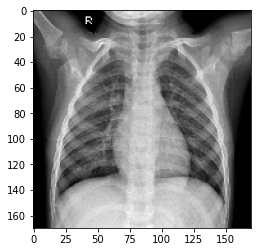

In [3]:
img = load_img('/kaggle/input/chest-xray-pneumonia/chest_xray/train/NORMAL/IM-0135-0001.jpeg',target_size=(170,170))
img = img_to_array(img)/255.
plt.imshow(img)

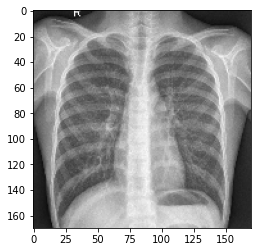

In [4]:
img = load_img('/kaggle/input/chest-xray-pneumonia/chest_xray/test/NORMAL/IM-0007-0001.jpeg',target_size=(170,170))
img = img_to_array(img)/255.
plt.imshow(img)

# 2.ImageDataGenerator

In [5]:
img_size=170
batch_size=32

train_datagen = ImageDataGenerator(rescale=1./255,
                                   rotation_range=45,
#                                    brightness_range=[0.4,0.8],
                                   width_shift_range=0.3, 
                                   height_shift_range=0.3, 
                                   horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

val_datagen=ImageDataGenerator(rescale=1/255.)

train_gen = train_datagen.flow_from_directory(
        '/kaggle/input/chest-xray-pneumonia/chest_xray/train/',  
        target_size=(img_size, img_size),  
        batch_size=batch_size,
        shuffle=True,
#         color_mode='grayscale',
        class_mode='binary'
        
) 

test_gen= test_datagen.flow_from_directory(
        '/kaggle/input/chest-xray-pneumonia/chest_xray/test/',
        target_size=(img_size, img_size),
        batch_size=batch_size,
        shuffle=False,
#         color_mode='grayscale',
        class_mode='binary'
)

val_gen= val_datagen.flow_from_directory(
        '/kaggle/input/chest-xray-pneumonia/chest_xray/val/',
        target_size=(img_size, img_size),
        batch_size=batch_size,
        shuffle=False,
#         color_mode='grayscale',
        class_mode='binary')



Found 5216 images belonging to 2 classes.
Found 624 images belonging to 2 classes.
Found 16 images belonging to 2 classes.


In [6]:
# train_gen.__dict__

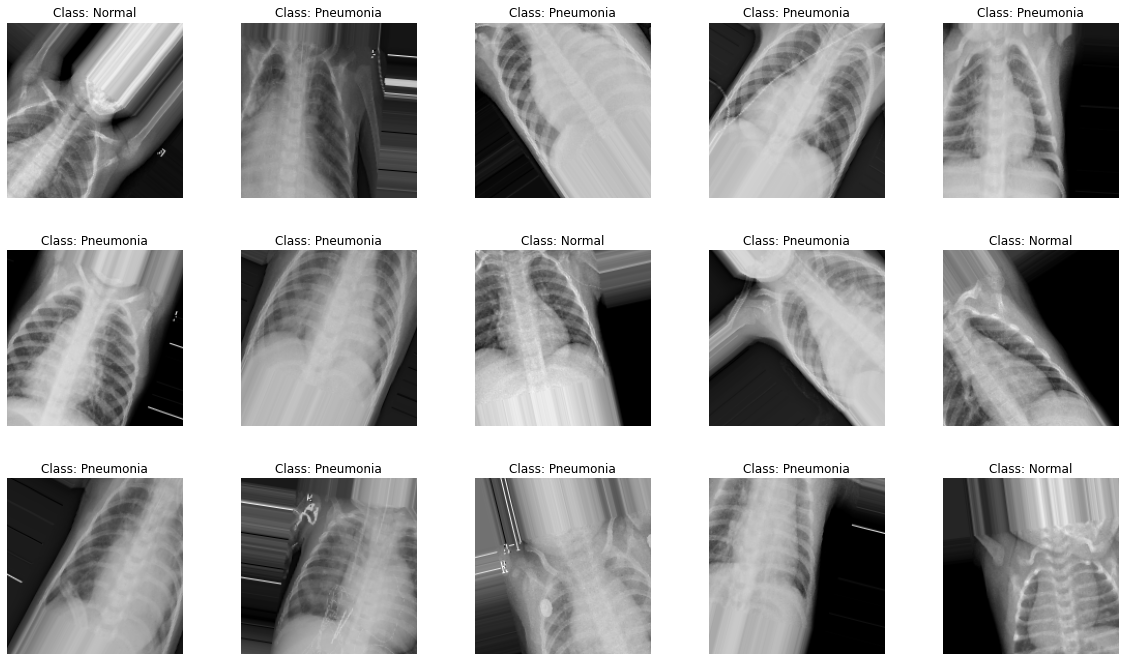

In [7]:
labels = ['Normal','Pneumonia']
samples = train_gen.__next__()
images = samples[0]
target = samples[1]

plt.figure(figsize = (20 , 20))
for i in range(15):
    plt.subplot(5 , 5, i+1)
    plt.subplots_adjust(hspace = 0.3 , wspace = 0.3)
    plt.imshow(images[i])
    plt.title(f"Class: {labels[int(target[i])]}")
    plt.axis('off')

# 3.Model Building

In [8]:
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Layer, Flatten, Dense, Input

In [9]:
model = Sequential()
model.add(Conv2D(32, (3,3), input_shape=(170,170,3), activation='relu', padding='same'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(64, (3, 3), activation = 'relu', padding='same'))
model.add(MaxPooling2D(2, 2))
model.add(Conv2D(128, (3, 3), activation = 'relu', padding='same'))
model.add(MaxPooling2D(2, 2))
model.add(Flatten())
model.add(Dense(units=128, activation='relu'))
model.add(Dense(units=1, activation='sigmoid'))

2023-02-10 12:17:09.691830: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-02-10 12:17:09.796220: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-02-10 12:17:09.797073: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-02-10 12:17:09.798377: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compil

In [10]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [11]:
history=model.fit(train_gen,validation_data=test_gen,epochs=20)

2023-02-10 12:17:13.342120: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/20


2023-02-10 12:17:15.549563: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


163/163 [==============================] - 133s 770ms/step - loss: 0.4563 - accuracy: 0.7728 - val_loss: 0.4788 - val_accuracy: 0.7372
Epoch 2/20
163/163 [==============================] - 94s 574ms/step - loss: 0.3767 - accuracy: 0.8100 - val_loss: 0.6456 - val_accuracy: 0.6907
Epoch 3/20
163/163 [==============================] - 93s 570ms/step - loss: 0.3173 - accuracy: 0.8541 - val_loss: 0.3338 - val_accuracy: 0.8750
Epoch 4/20
163/163 [==============================] - 92s 565ms/step - loss: 0.2717 - accuracy: 0.8777 - val_loss: 0.6180 - val_accuracy: 0.7099
Epoch 5/20
163/163 [==============================] - 93s 569ms/step - loss: 0.2535 - accuracy: 0.8850 - val_loss: 0.3126 - val_accuracy: 0.8606
Epoch 6/20
163/163 [==============================] - 93s 570ms/step - loss: 0.2442 - accuracy: 0.8930 - val_loss: 0.3498 - val_accuracy: 0.8349
Epoch 7/20
163/163 [==============================] - 93s 571ms/step - loss: 0.2176 - accuracy: 0.9076 - val_loss: 0.3760 - val_accuracy: 0.

# 4. Learning Curve

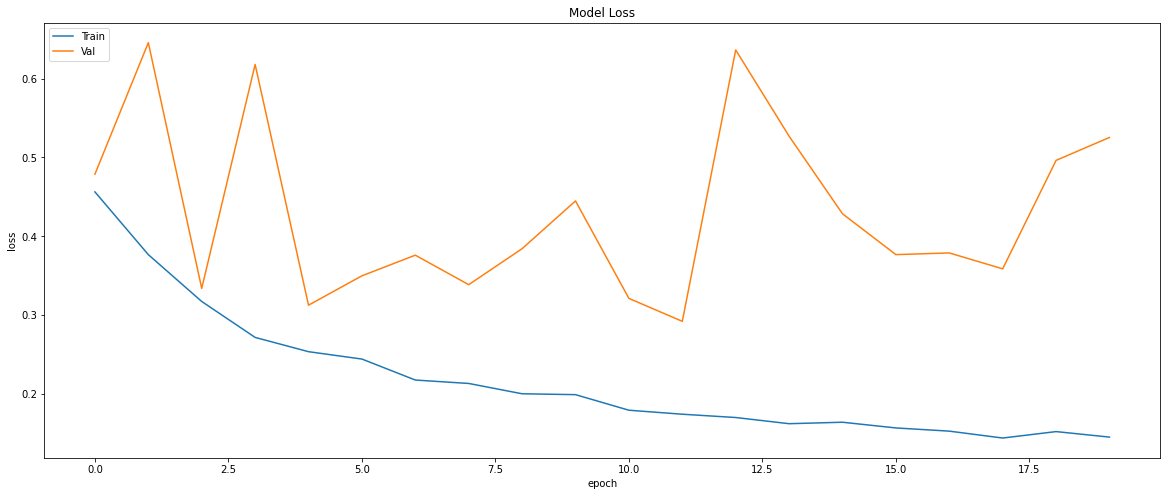

In [12]:
plt.figure(figsize=(20,8))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

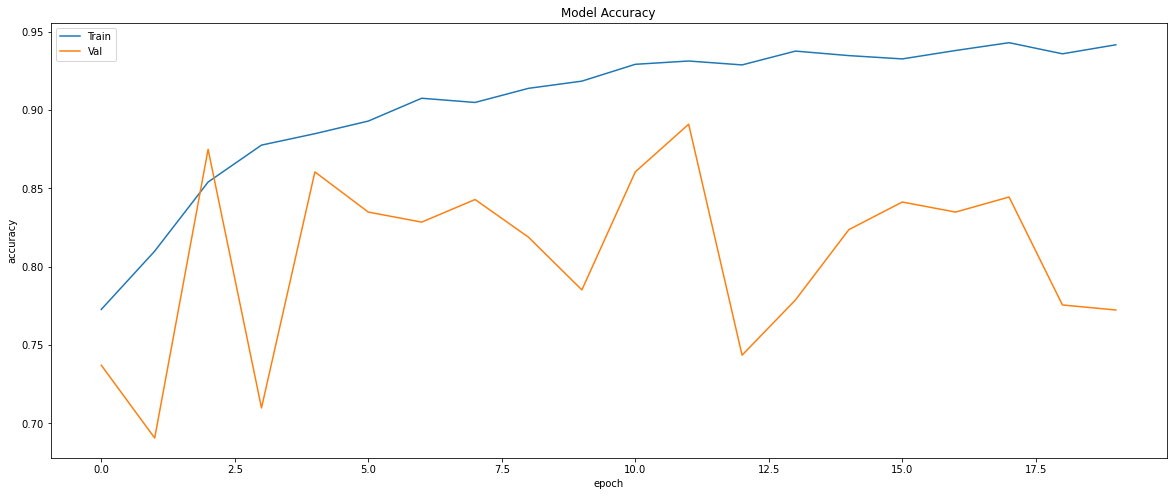

In [13]:
plt.figure(figsize=(20,8))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

Data augmentation techniques that will be suitable for this problem will be rotation,height and width range shift.

# 5. Model Performance

In [14]:
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report

In [15]:
y_test =test_gen.classes
y_pred = model.predict(test_gen)
y_pred_probs = y_pred.copy()

In [16]:
y_pred[y_pred>0.5] = 1
y_pred[y_pred<0.5] = 0

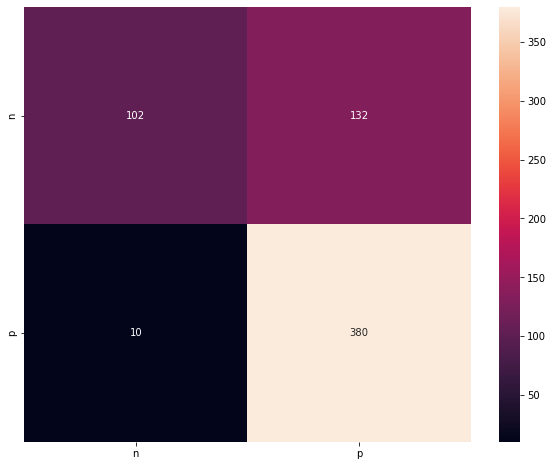

In [17]:
plt.figure(figsize=(10,8))
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,fmt='.3g',xticklabels=['n','p'],
            yticklabels=['n','p'])
plt.show()

In [18]:
accuracy_score(y_test,y_pred)

0.7724358974358975

In [19]:
print(classification_report(y_test,y_pred,target_names = ['normal','pneumonia']))

              precision    recall  f1-score   support

      normal       0.91      0.44      0.59       234
   pneumonia       0.74      0.97      0.84       390

    accuracy                           0.77       624
   macro avg       0.83      0.71      0.72       624
weighted avg       0.81      0.77      0.75       624



Type-1 error is more dangerous then type-2 error.
Type-1 error is rejecting null hypotheses that is actually true (false positive)

Type-2 error is when we fail to reject null hypothesis(false negative)
We can reduce type-1 and type-2 error by increasing sample size.

In medical diagonsis type-1 error is very dangerous.


Null hypothesis : Person has Pneumonia.
Alternate hypothesis:Person doesnt have Pneumonia.

Type-1 error(False-Positive):misclassifying that a person does not have Pneumonia whenin reality he has Pneumonia
(This is a bigger problem).

Type-2 error(False-Negative): misclassifyingthat a person has Pneumonia when in reality he doesn’t.



We can use confusion matrix to determine the type of error.From the above confusion matrix we infer that there are 118 cases of type-1 error and 9 cases of type-2 error.So our model is predicition more false negative cases.Its classifying a person has Pneumonia when in reality he doesn't.

In [20]:
filenames = test_gen.filenames
data = pd.DataFrame()
data['filename'] = filenames
data['actual_class'] = y_test
data['predicted_class'] = y_pred
data['predicted_prob'] = y_pred_probs

# 6 Missclassified Samples

In [21]:
misclassification = data[data['actual_class']!=data['predicted_class']]

In [22]:
misclassification[(misclassification['actual_class']==0) & (misclassification['predicted_prob']>0.9)].value_counts().sum()

43

In [23]:
misclassification[(misclassification['actual_class']==0) & (misclassification['predicted_prob']>0.9)]

,filename,actual_class,predicted_class,predicted_prob
5,NORMAL/IM-0009-0001.jpeg,0,1.0,0.946392
11,NORMAL/IM-0015-0001.jpeg,0,1.0,0.918222
14,NORMAL/IM-0019-0001.jpeg,0,1.0,0.938632
16,NORMAL/IM-0022-0001.jpeg,0,1.0,0.991043
44,NORMAL/IM-0071-0001.jpeg,0,1.0,0.932984
45,NORMAL/IM-0073-0001.jpeg,0,1.0,0.964291
47,NORMAL/IM-0077-0001.jpeg,0,1.0,0.977923
49,NORMAL/IM-0081-0001.jpeg,0,1.0,0.986831
52,NORMAL/IM-0085-0001.jpeg,0,1.0,0.959160
61,NORMAL/IM-0101-0001.jpeg,0,1.0,0.996364


In [24]:
misclassification[(misclassification['actual_class']==1) & (misclassification['predicted_prob']<0.5)].value_counts().sum()

10

In [25]:
misclassification[(misclassification['actual_class']==1) & (misclassification['predicted_prob']<0.5)]

,filename,actual_class,predicted_class,predicted_prob
391,PNEUMONIA/person154_bacteria_728.jpeg,1,0.0,0.222726
404,PNEUMONIA/person15_virus_46.jpeg,1,0.0,0.299150
446,PNEUMONIA/person1655_virus_2861.jpeg,1,0.0,0.367581
473,PNEUMONIA/person16_virus_47.jpeg,1,0.0,0.459275
479,PNEUMONIA/person173_bacteria_831.jpeg,1,0.0,0.473614
496,PNEUMONIA/person21_virus_53.jpeg,1,0.0,0.249763
511,PNEUMONIA/person35_virus_80.jpeg,1,0.0,0.347947
530,PNEUMONIA/person49_virus_101.jpeg,1,0.0,0.172160
566,PNEUMONIA/person78_virus_140.jpeg,1,0.0,0.369169
567,PNEUMONIA/person79_virus_148.jpeg,1,0.0,0.223734


In [26]:
img = load_img('/kaggle/input/chest-xray-pneumonia/chest_xray/test/NORMAL/IM-0022-0001.jpeg',
               target_size=(170,170))
img = img_to_array(img)/255.

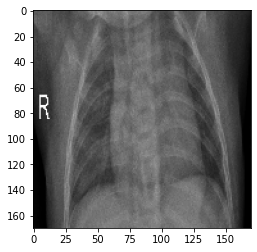

In [27]:
plt.imshow(img)

In [28]:
img = np.expand_dims(img,axis=0)
img.shape

(1, 170, 170, 3)

In [29]:
model.layers

In [30]:
layer_model = Model(inputs=model.inputs, outputs=model.layers[1].output)
feature_maps = layer_model.predict(img)

In [31]:
feature_maps.shape

(1, 85, 85, 32)

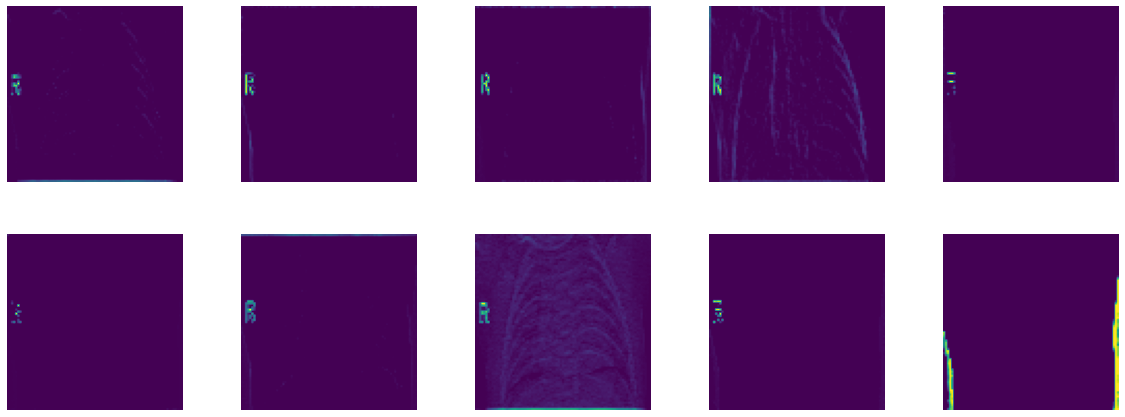

In [32]:
plt.figure(figsize = (20 , 20))
for i in range(10):
    plt.subplot(5 , 5, i+1)
    plt.subplots_adjust(hspace = 0.3 , wspace = 0.3)
    plt.imshow(feature_maps[0,:,:,i])
    plt.axis('off')